In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [2]:
#template  = Image.open('Assignment1/Data/trailerSlightlyBigger.png').convert('L')
#template = Image.open('Data/trailer.png').convert('L')
#image = Image.open('Assignment1/Data/u2cuba.jpg').convert('L')
#template = Image.open('Assignment1/Data/self_photo.png').convert('L')
image = Image.open('Data/clown.tif').convert('L')

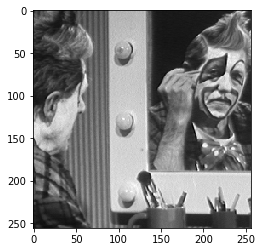

In [3]:
plt.imshow(image,cmap='gray')

In [4]:
image = np.asarray(image)
vertical_edges = np.asarray([[1,0,-1],[2,0,-2],[1,0,-1]]) # verical edge
horizontal_edges = np.asarray([[1,2,1],[0,0,0],[-1,-2,-1]]) # horizontal edges
image=image/255
#template=template/255
#image = (image- image.mean())/ (np.std(image))
#template = (template-template.mean())/(np.std(template))
print(image.shape," ",vertical_edges.shape," ",horizontal_edges)

(256, 256)   (3, 3)   [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


In [5]:
def my_conv2(image, filters):
    # perform cross_correlation between image and filter
    output = np.zeros(shape=((image.shape[0]-(filters.shape[0])+1),(image.shape[1]-(filters.shape[1])+1)))
    #output = np.zeros(shape=(image.shape[0],image.shape[1]))
    filters = np.flip(np.flip(filters,axis=0),axis=1)
    print("Output shape is ",output.shape)
    k1= (int)((filters.shape[0]-1)/2)
    rem1= filters.shape[0]-(2*k1)
    k2= int((filters.shape[1]-1)/2)
    rem2= filters.shape[1]-(2*k2)
    for i in range(k1,image.shape[0]-k1-1):
        for j in range(k2,image.shape[1]-k2-1):
            image_area= image[i-k1:i+k1+rem1,j-k2:j+k2+rem2]
            temp = np.multiply(image_area,filters)
            temp_sum = np.sum(temp)
            output[i-k1,j-k2]=temp_sum
    return output

In [6]:
import timeit
start_time = timeit.timeit()
imageOut_vertical=my_conv2(image, vertical_edges)
end_time = timeit.timeit()
print("Time taken is", end_time-start_time)
imageOut_horizontal=my_conv2(image, horizontal_edges)

Output shape is  (254, 254)
Time taken is -0.020878801000208114
Output shape is  (254, 254)


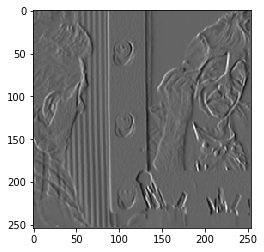

In [7]:
plt.imshow(imageOut_vertical,cmap='gray')

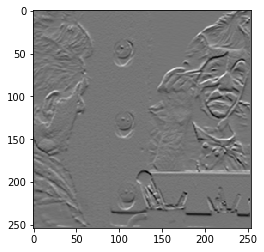

In [8]:
plt.imshow(imageOut_horizontal,cmap='gray')

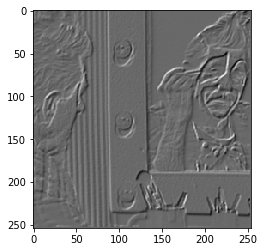

In [9]:
result = imageOut_horizontal+imageOut_vertical
plt.imshow(result,cmap='gray')

Output shape is  (254, 254)


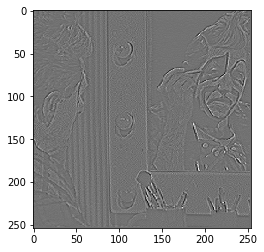

In [10]:
laplacian_filter = np.asarray([[0,-1,0],[-1,4,-1],[0,-1,0]])
imageOut_laplacian=my_conv2(image, laplacian_filter)
plt.imshow(imageOut_laplacian,cmap='gray')

Time taken is -0.00019955900006607408


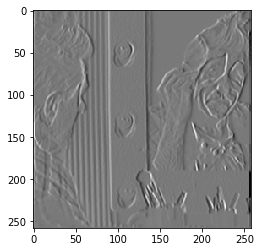

In [11]:
from scipy import signal
start_time = timeit.timeit()
result = signal.convolve2d(image,vertical_edges)
end_time = timeit.timeit()
print("Time taken is", end_time-start_time)
plt.imshow(result,cmap='gray')

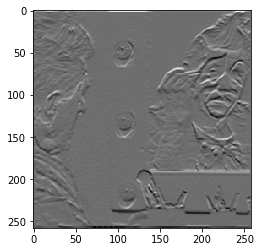

In [12]:
result = signal.convolve2d(image,horizontal_edges)
plt.imshow(result,cmap='gray')